<a href="https://colab.research.google.com/github/bijeshsingha/NLP_DNN/blob/master/GroupAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Group Details:
1. Bijesh Singha - FT262001
2. Ayush Upadhyay - FT262013
3. Darshan Otswal - FT263073
4. Priyanka T - FT261071

# Objective
The primary objective of this project is to develop and compare two robust machine learning models for sentiment analysis on a provided textual dataset. This comparative analysis will assess the impact of different text vectorization techniques: Bag-of-Words (BoW) and Term Frequency-Inverse Document Frequency (TF-IDF), on classification performance.

The execution will follow a detailed, multi-stage methodology:

* Data Preparation and NLP Cleansing: Load the dataset and apply a comprehensive suite of Natural Language Processing (NLP) text cleaning steps. This process includes standardizing text (lowercasing, removal of unwanted characters, URLs, and HTML tags), refining the corpus through effective handling of stopwords, correcting spelling errors, and replacing common acronyms with their full forms to ensure data quality and model readiness.

* Feature Engineering: Generate numerical feature representations of the cleaned text using two independent methods: CountVectorizer (BoW) and TfidfVectorizer (TF-IDF).

* Model Construction and Evaluation: Construct a classification model using the Deep Neural Network algorithm over the feature sets generated by both the BoW and TF-IDF vectorizers.

* Comparative Analysis: Evaluate the performance of the two resulting classification models based on standard classification metrics (e.g., accuracy, precision, recall, F1-score). A critical analysis will be conducted to explain any observed differences in performance between the BoW-based and TF-IDF-based models, focusing on the theoretical advantages of each vectorization technique.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ankurzing/sentiment-analysis-for-financial-news")

print("Path to dataset files:", path)

100%|██████████| 903k/903k [00:00<00:00, 1.82MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ankurzing/sentiment-analysis-for-financial-news/versions/5


In [4]:
!pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 55.8 MB/s eta 0:00:00


In [5]:
import pandas as pd
import sys

# Dictionary to store library versions
library_versions = {
    'pandas': 'N/A',
    'numpy': 'N/A',
    're': 'N/A', # re is a built-in module, usually doesn't have __version__
    'nltk': 'N/A',
    'pyspellchecker': 'N/A',
    'sklearn': 'N/A'
}

# Get versions of installed libraries
try:
    import pandas
    library_versions['pandas'] = pandas.__version__
except ImportError:
    pass

try:
    import numpy
    library_versions['numpy'] = numpy.__version__
except ImportError:
    pass

try:
    import nltk
    library_versions['nltk'] = nltk.__version__
except ImportError:
    pass

try:
    import spellchecker
    library_versions['pyspellchecker'] = spellchecker.__version__
except ImportError:
    pass

try:
    import sklearn
    library_versions['sklearn'] = sklearn.__version__
except ImportError:
    pass

# Create a DataFrame from the dictionary
versions_df = pd.DataFrame(list(library_versions.items()), columns=['Library', 'Version'])

# Display the DataFrame
display(versions_df)

,Library,Version
0,pandas,2.2.2
1,numpy,2.0.2
2,re,N/A
3,nltk,3.9.1
4,pyspellchecker,0.8.4
5,sklearn,1.6.1


In [6]:
import os
import pandas as pd

# List contents of the downloaded directory
file_path = '/root/.cache/kagglehub/datasets/ankurzing/sentiment-analysis-for-financial-news/versions/5'
print(os.listdir(file_path))

['all-data.csv', 'FinancialPhraseBank']


In [7]:
import pandas as pd

# Construct the full path to the CSV file
csv_file_path = os.path.join(file_path, 'all-data.csv')

# Load the CSV into a pandas DataFrame
df = pd.read_csv(csv_file_path, encoding='latin-1', header=None)

# Display the first 5 rows of the DataFrame
display(df.head())

,0,1
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


# Data Source Acknowledgment
The data utilized for this sentiment analysis project is the Financial News Sentiment Dataset, sourced from Kaggle.

Dataset Name: Sentiment Analysis for Financial News

Original Author/Contributor: Ankur Singh

Source URL: https://www.kaggle.com/datasets/ankurzing/sentiment-analysis-for-financial-news

The dataset consists of various news headlines and their corresponding sentiment labels (e.g., positive, negative, or neutral), making it highly suitable for the comparative analysis of NLP vectorization techniques and machine learning classification implemented in this project.


## Rename DataFrame Columns

### Subtask:
Rename the columns of the DataFrame 'df' to meaningful names like 'Sentiment' and 'Text' for better readability and usability.


**Reasoning**:
To improve readability and usability, I will rename the columns of the DataFrame `df` from `0` to 'Sentiment' and `1` to 'Text'.



In [8]:
df.rename(columns={0: 'Sentiment', 1: 'Text'}, inplace=True)
display(df.head())

,Sentiment,Text
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [9]:
X = df['Text']
y = df['Sentiment']

print("X head:")
display(X.head())

print("\ny head:")
display(y.head())

X head:


,Text
0,"According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...
2,The international electronic industry company ...
3,With the new production plant the company woul...
4,According to the company 's updated strategy f...



y head:


,Sentiment
0,neutral
1,neutral
2,negative
3,positive
4,positive


In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3876,)
Shape of X_test: (970,)
Shape of y_train: (3876,)
Shape of y_test: (970,)


In [11]:
print("type of X_train: {}".format( type(X_train)))

print(" length of text_train: {}".format(len( X_train)))

print("\n\n text_train[5]:\n{}".format( X_train[0:6]))

type of X_train: <class 'pandas.core.series.Series'>
 length of text_train: 3876


 text_train[5]:
432     In Russia , Raisio 's Food Division 's home ma...
3071    Operators only need to learn how to use one de...
289     The company expects its net sales in the first...
2588    The bridge will be 1.2 km long and is located ...
4121    Nokia and Capcom announced that Resident Evil ...
4489    At the same time I am delighted by the fact th...
Name: Text, dtype: object


In [12]:
print("type of X_test: {}".format( type(X_test)))

print(" length of X_test: {}".format(len(X_test)))

print("\n\n X_test[6]:\n{}".format( X_test.iloc[6]))

print("\n\n y_test[6]:\n{}".format (y_test.iloc[6]))

type of X_test: <class 'pandas.core.series.Series'>
 length of X_test: 970


 X_test[6]:
Finnish-owned contract manufacturer of electronics Elcoteq Hungary Kft has announced plans to recruit more than 650 new staffers to fulfill new orders in P+_cs , where the company has two plants .


 y_test[6]:
positive


#

# Text Cleaning

# Task
Define a Python function to clean text data by converting it to lowercase, removing URLs, stripping HTML tags, and removing all non-alphanumeric characters (except spaces) and extra spaces, then apply this function to the `X_train` and `X_test` Series.

## Define Text Cleaning Functions (URLs, HTML, Special Chars, Lowercase)

Create a function that takes a text string and performs several cleaning operations: converting to lowercase, removing URLs, stripping HTML tags, and removing all non-alphanumeric characters (except spaces) and extra spaces. This function will consolidate multiple text cleansing steps into one reusable block.


**Reasoning**:
I need to define a `clean_text` function that performs various text cleaning operations as specified in the instructions, including converting to lowercase, removing URLs, stripping HTML tags, removing non-alphanumeric characters, and handling spaces. I will use the `re` module for this.



In [13]:
import re

def clean_text(text):
    """Performs several text cleaning operations on the input string."""
    # 1. Convert to lowercase
    text = text.lower()

    # 2. Remove URLs
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text)

    # 3. Strip HTML tags
    text = re.sub(r'<.*?>', '', text)

    # 4. Remove all non-alphanumeric characters (except spaces)
    text = re.sub(r'[^a-zA-Z0-9 ]', '', text)

    # 5. Replace multiple spaces with a single space and strip leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Test the function with a sample text
sample_text = "This is a sample text with a URL: https://example.com/page?id=123, HTML <b>tags</b>, special characters like @#$%^&*, and multiple spaces. <br /><br /> Another line!"
cleaned_sample_text = clean_text(sample_text)

print("Original Text:", sample_text)
print("Cleaned Text:", cleaned_sample_text)


Original Text: This is a sample text with a URL: https://example.com/page?id=123, HTML <b>tags</b>, special characters like @#$%^&*, and multiple spaces. <br /><br /> Another line!
Cleaned Text: this is a sample text with a url html tags special characters like and multiple spaces another line


**Reasoning**:
Now that the `clean_text` function is defined and tested, I will apply this function to the 'Text' columns of `X_train` and `X_test` to clean the actual training and testing data.



In [14]:
X_train_cleaned = X_train.apply(clean_text)
X_test_cleaned = X_test.apply(clean_text)

print("Original X_train head (first 5 entries):")
display(X_train.head())

print("\nCleaned X_train head (first 5 entries):")
display(X_train_cleaned.head())

print("\nOriginal X_test head (first 5 entries):")
display(X_test.head())

print("\nCleaned X_test head (first 5 entries):")
display(X_test_cleaned.head())

Original X_train head (first 5 entries):


,Text
432,"In Russia , Raisio 's Food Division 's home ma..."
3071,Operators only need to learn how to use one de...
289,The company expects its net sales in the first...
2588,The bridge will be 1.2 km long and is located ...
4121,Nokia and Capcom announced that Resident Evil ...



Cleaned X_train head (first 5 entries):


,Text
432,in russia raisio s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 km long and is located b...
4121,nokia and capcom announced that resident evil ...



Original X_test head (first 5 entries):


,Text
3207,The company was supposed to deliver machinery ...
1684,UNC Charlotte would also deploy SSH Tectia Con...
1044,"In 2009 , Lee & Man had a combined annual prod..."
4145,`` That 's a very high figure on the European ...
1538,"In Finland , the corresponding service is Alma..."



Cleaned X_test head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,unc charlotte would also deploy ssh tectia con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...


# Task
Define a Python function `correct_spellings` that takes a text string as input, corrects any spelling errors in it using the `SpellChecker` from the `pyspellchecker` library, and returns the corrected text.

## Define a Python function `correct_spellings` that takes a text string as input, corrects any spelling errors in it using the `SpellChecker` from the `pyspellchecker` library, and returns the corrected text.

### Subtask:
Define a function `correct_spellings` that uses `SpellChecker` to correct spelling errors in an input text string.


**Reasoning**:
I need to import the `SpellChecker` class, instantiate it, define the `correct_spellings` function as per the instructions, and then test it with a sample sentence.



In [13]:
from spellchecker import SpellChecker

# Instantiate a SpellChecker object (language='en' by default)
spell = SpellChecker(language='en')

def correct_spellings(text):
    """Corrects spelling errors in the input text using SpellChecker."""
    # Split the text into words
    words = text.split()
    corrected_words = []
    for word in words:
        # Get the most probable correct spelling for each word
        corrected_word = spell.correction(word)
        if corrected_word is not None:
            corrected_words.append(corrected_word)
        else:
            # If no correction is found, keep the original word
            corrected_words.append(word)

    # Join the corrected words back into a single string
    return " ".join(corrected_words)

# Test the function with a sample sentence
sample_text_with_errors = "This is a samle txt with some speling erors."
corrected_sample_text = correct_spellings(sample_text_with_errors)

print("Original Text:", sample_text_with_errors)
print("Corrected Text:", corrected_sample_text)

Original Text: This is a samle txt with some speling erors.
Corrected Text: This is a same text with some spelling errors


**Reasoning**:
Now that the `correct_spellings` function is defined and tested, I will apply this function to the `X_train_cleaned` and `X_test_cleaned` Series to correct spelling errors in the training and testing data.



In [ ]:

X_train_spell_corrected = X_train_cleaned.apply(correct_spellings)
X_test_spell_corrected = X_test_cleaned.apply(correct_spellings)

print("Original X_train_cleaned head (first 5 entries):")
display(X_train_cleaned.head())

print("\nSpell-corrected X_train head (first 5 entries):")
display(X_train_spell_corrected.head())

print("\nOriginal X_test_cleaned head (first 5 entries):")
display(X_test_cleaned.head())

print("\nSpell-corrected X_test head (first 5 entries):")
display(X_test_spell_corrected.head())

Original X_train_cleaned head (first 5 entries):


,Text
432,in russia raisio s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 km long and is located b...
4121,nokia and capcom announced that resident evil ...



Spell-corrected X_train head (first 5 entries):


,Text
432,in russia raisin s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 am long and is located b...
4121,nokia and captor announced that resident evil ...



Original X_test_cleaned head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,unc charlotte would also deploy ssh tectia con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...



Spell-corrected X_test head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,una charlotte would also deploy ssh tactic con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...


In [ ]:
X_train_spell_corrected.to_excel("X_train_spell_corrected.xlsx")
X_test_spell_corrected.to_excel("X_test_spell_corrected.xlsx")

In [15]:
# Load X_train_spell_corrected from Excel
X_train_spell_corrected = pd.read_excel("X_train_spell_corrected.xlsx", index_col=0)

# Load X_test_spell_corrected from Excel
X_test_spell_corrected = pd.read_excel("X_test_spell_corrected.xlsx", index_col=0)

print("X_train_loaded head:")
display(X_train_spell_corrected.head())

print("\nX_test_loaded head:")
display(X_test_spell_corrected.head())

X_train_loaded head:


,Text
432,in russia raisin s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 am long and is located b...
4121,nokia and captor announced that resident evil ...



X_test_loaded head:


,Text
3207,the company was supposed to deliver machinery ...
1684,una charlotte would also deploy ssh tactic con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...


# Punctuation Remove

In [16]:
import string

PUNCT_TO_REMOVE = string.punctuation    #list of standard python punctuations


def remove_punctuation(text):
    """custom function to remove the punctuation"""
    return text.translate(str.maketrans('', '', PUNCT_TO_REMOVE))   # tranlate "" to "" and delete all punctuations


text = "hurray!"
remove_punctuation(text)


#PUNCT_TO_REMOVE = string.punctuation   # !"#$%&'()*+,-./:;<=>?@[\]^_`{|}~
#str.maketrans('', '', PUNCT_TO_REMOVE)

'hurray'

In [17]:
X_train_no_punct = X_train_spell_corrected['Text'].apply(remove_punctuation)
X_test_no_punct = X_test_spell_corrected['Text'].apply(remove_punctuation)

print("Original X_train_spell_corrected head (first 5 entries):")
display(X_train_spell_corrected.head())

print("\nProcessed X_train_no_punct head (first 5 entries):")
display(X_train_no_punct.head())

print("\nOriginal X_test_spell_corrected head (first 5 entries):")
display(X_test_spell_corrected.head())

print("\nProcessed X_test_no_punct head (first 5 entries):")
display(X_test_no_punct.head())

Original X_train_spell_corrected head (first 5 entries):


,Text
432,in russia raisin s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 am long and is located b...
4121,nokia and captor announced that resident evil ...



Processed X_train_no_punct head (first 5 entries):


,Text
432,in russia raisin s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 am long and is located b...
4121,nokia and captor announced that resident evil ...



Original X_test_spell_corrected head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,una charlotte would also deploy ssh tactic con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...



Processed X_test_no_punct head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,una charlotte would also deploy ssh tactic con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...


# Remove stopwords

In [18]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Convert to set
stop_words = set(ENGLISH_STOP_WORDS)

In [19]:
def remove_stopwords(text):
    """custom function to remove the stopwords"""

    return " ".join([word for word in str(text).split() if word not in stop_words])

In [20]:
X_train_no_stopwords = X_train_no_punct.apply(remove_stopwords)
X_test_no_stopwords = X_test_no_punct.apply(remove_stopwords)

print("Original X_train_no_punct head (first 5 entries):")
display(X_train_no_punct.head())

print("\nProcessed X_train_no_stopwords head (first 5 entries):")
display(X_train_no_stopwords.head())

print("\nOriginal X_test_no_punct head (first 5 entries):")
display(X_test_no_punct.head())

print("\nProcessed X_test_no_stopwords head (first 5 entries):")
display(X_test_no_stopwords.head())

Original X_train_no_punct head (first 5 entries):


,Text
432,in russia raisin s food division s home market...
3071,operators only need to learn how to use one de...
289,the company expects its net sales in the first...
2588,the bridge will be 12 am long and is located b...
4121,nokia and captor announced that resident evil ...



Processed X_train_no_stopwords head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operators need learn use device multiple level...
289,company expects net sales half 2008 reach prev...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Original X_test_no_punct head (first 5 entries):


,Text
3207,the company was supposed to deliver machinery ...
1684,una charlotte would also deploy ssh tactic con...
1044,in 2009 lee man had a combined annual producti...
4145,that s a very high figure on the european scal...
1538,in finland the corresponding service is alma m...



Processed X_test_no_stopwords head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma media s etu...


In [21]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_words(text):
    return " ".join([lemmatizer.lemmatize(word) for word in text.split()])


In [22]:
import nltk
nltk.download('wordnet')

X_train_lemmatized = X_train_no_stopwords.apply(lemmatize_words)
X_test_lemmatized = X_test_no_stopwords.apply(lemmatize_words)

print("Original X_train_no_stopwords head (first 5 entries):")
display(X_train_no_stopwords.head())

print("\nProcessed X_train_lemmatized head (first 5 entries):")
display(X_train_lemmatized.head())

print("\nOriginal X_test_no_stopwords head (first 5 entries):")
display(X_test_no_stopwords.head())

print("\nProcessed X_test_lemmatized head (first 5 entries):")
display(X_test_lemmatized.head())

[nltk_data] Downloading package wordnet to /root/nltk_data...


Original X_train_no_stopwords head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operators need learn use device multiple level...
289,company expects net sales half 2008 reach prev...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Processed X_train_lemmatized head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operator need learn use device multiple level ...
289,company expects net sale half 2008 reach previ...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Original X_test_no_stopwords head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma media s etu...



Processed X_test_lemmatized head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma medium s et...


In [23]:
!pip install demoji

import demoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.6 MB/s eta 0:00:00


## Replace Emojis with Words

To ensure all text data is in a consistent and analyzable format, emojis will be replaced with their corresponding English word descriptions. This step helps in standardizing the text and preventing emojis from being treated as irrelevant characters during feature extraction.

In [24]:
def replace_emojis_with_words(text):
    """Replaces emojis in a string with their corresponding English word descriptions."""
    return demoji.replace_with_desc(text, sep=" ")

# Test the function with a sample text
sample_text_with_emojis = "Hello world! 👋 This is great 👍😊"
cleaned_sample_text_emojis = replace_emojis_with_words(sample_text_with_emojis)

print("Original Text:", sample_text_with_emojis)
print("Cleaned Text:", cleaned_sample_text_emojis)

Original Text: Hello world! 👋 This is great 👍😊
Cleaned Text: Hello world!  waving hand  This is great  thumbs up  smiling face with smiling eyes 


In [25]:
X_train_no_emojis = X_train_lemmatized.apply(replace_emojis_with_words)
X_test_no_emojis = X_test_lemmatized.apply(replace_emojis_with_words)

print("Original X_train_lemmatized head (first 5 entries):")
display(X_train_lemmatized.head())

print("\nProcessed X_train_no_emojis head (first 5 entries):")
display(X_train_no_emojis.head())

print("\nOriginal X_test_lemmatized head (first 5 entries):")
display(X_test_lemmatized.head())

print("\nProcessed X_test_no_emojis head (first 5 entries):")
display(X_test_no_emojis.head())

Original X_train_lemmatized head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operator need learn use device multiple level ...
289,company expects net sale half 2008 reach previ...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Processed X_train_no_emojis head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operator need learn use device multiple level ...
289,company expects net sale half 2008 reach previ...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Original X_test_lemmatized head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma medium s et...



Processed X_test_no_emojis head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma medium s et...


## Replace Acronyms with Full Forms

To standardize the text and improve readability, common acronyms will be replaced with their full word forms. This helps in consistent interpretation and feature extraction.

In [26]:
# Create a Python dictionary for common acronyms and their full forms for financial news analysis
acronyms_financial = {
    "ATH": "All-Time High",
    "ATL": "All-Time Low",
    "DD": "Due Diligence",
    "DYOR": "Do Your Own Research",
    "FOMO": "Fear Of Missing Out",
    "FUD": "Fear, Uncertainty, and Doubt",
    "HODL": "Hold On for Dear Life",
    "IMO": "In My Opinion",
    "IMHO": "In My Humble Opinion",
    "LFG": "Let's F**king Go!",
    "YOLO": "You Only Live Once",
    "EOD": "End of Day",
    "EPS": "Earnings Per Share",
    "PE": "Price-to-Earnings Ratio",
    "IPO": "Initial Public Offering",
    "FED": "Federal Reserve",
    "CPI": "Consumer Price Index",
    "NFP": "Non-Farm Payrolls",
    "M&A": "Mergers and Acquisitions",
    "OTM": "Out of the Money (Options)",
    "ITM": "In the Money (Options)"
}

def replace_acronyms(text):
    """Replaces common acronyms in a string with their full forms."""
    # Use a regular expression to find whole words that are acronyms
    # and replace them. re.IGNORECASE makes it case-insensitive.
    for acr, full_form in acronyms_financial.items():
        text = re.sub(r'\b' + re.escape(acr) + r'\b', full_form, text, flags=re.IGNORECASE)
    return text

# Test the function with a sample text
sample_text_with_acronyms = "fyi, the meeting is atm and btw, lol"
cleaned_sample_text_acronyms = replace_acronyms(sample_text_with_acronyms)

print("Original Text:", sample_text_with_acronyms)
print("Cleaned Text:", cleaned_sample_text_acronyms)

Original Text: fyi, the meeting is atm and btw, lol
Cleaned Text: fyi, the meeting is atm and btw, lol


In [27]:
X_train_no_acronyms = X_train_no_emojis.apply(replace_acronyms)
X_test_no_acronyms = X_test_no_emojis.apply(replace_acronyms)

print("Original X_train_no_emojis head (first 5 entries):")
display(X_train_no_emojis.head())

print("\nProcessed X_train_no_acronyms head (first 5 entries):")
display(X_train_no_acronyms.head())

print("\nOriginal X_test_no_emojis head (first 5 entries):")
display(X_test_no_emojis.head())

print("\nProcessed X_test_no_acronyms head (first 5 entries):")
display(X_test_no_acronyms.head())

Original X_train_no_emojis head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operator need learn use device multiple level ...
289,company expects net sale half 2008 reach previ...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Processed X_train_no_acronyms head (first 5 entries):


,Text
432,russia raisin s food division s home market st...
3071,operator need learn use device multiple level ...
289,company expects net sale half 2008 reach previ...
2588,bridge 12 long located anasmotet road end new ...
4121,nokia captor announced resident evil degenerat...



Original X_test_no_emojis head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma medium s et...



Processed X_test_no_acronyms head (first 5 entries):


,Text
3207,company supposed deliver machinery veneer toms...
1684,una charlotte deploy ssh tactic connector enab...
1044,2009 lee man combined annual production capaci...
4145,s high figure european scale noon said recalli...
1538,finland corresponding service alma medium s et...


## Feature Engineering: Bag-of-Words (BoW)

We will now convert the preprocessed text data into numerical feature vectors using the Bag-of-Words model. This involves tokenizing the text and counting the occurrences of each word, creating a matrix where each row represents a document and each column represents a word from the vocabulary.

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize CountVectorizer for Bag-of-Words
# We use the preprocessed text after removing acronyms
bow_vectorizer = CountVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_bow = bow_vectorizer.fit_transform(X_train_no_acronyms)

# Transform the test data using the *fitted* vectorizer
X_test_bow = bow_vectorizer.transform(X_test_no_acronyms)

print("Shape of X_train_bow:", X_train_bow.shape)
print("Shape of X_test_bow:", X_test_bow.shape)

# Display the first few feature names to understand the vocabulary
print("\nFirst 10 features (words) from BoW vectorizer:")
display(bow_vectorizer.get_feature_names_out()[:10])

Shape of X_train_bow: (3876, 8123)
Shape of X_test_bow: (970, 8123)

First 10 features (words) from BoW vectorizer:


array(['00', '000', '000063', '0008', '001', '002', '0025', '003', '0030',
       '004'], dtype=object)

## Model Construction and Evaluation: Deep Neural Network with Bag-of-Words

Now, we will train a DNN model using the Bag-of-Words (BoW) feature representation. After training, the model's performance will be evaluated on the test set using various classification metrics.

Shape of y_train_one_hot: (3876, 3)
Shape of y_test_one_hot: (970, 3)
Shape of X_train_bow_dense: (3876, 8123)
Shape of X_test_bow_dense: (970, 8123)

DNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     1,039,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,048,323 (4.00 MB)

 Trainable params: 1,048,323 (4.00 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.6037 - loss: 0.9019 - val_accuracy: 0.6985 - val_loss: 0.6987
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8629 - loss: 0.3769 - val_accuracy: 0.7113 - val_loss: 0.7612
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.9646 - loss: 0.1297 - val_accuracy: 0.7113 - val_loss: 0.9074
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9824 - loss: 0.0625 - val_accuracy: 0.6985 - val_loss: 1.1071
--- Training Finished ---

--- Evaluating Model Performance ---
Test Loss: 0.6516
Test Accuracy: 0.7371

--- Detailed Classification Report ---
              precision    recall  f1-score   support

    negative       0.73      0.44      0.55       110
     neutral       0.74      0.92      0.82       571
    positive       0.73      0.48      0.58       289

    accuracy                           0.74       970
   macro avg       0.73      0.61      0.65

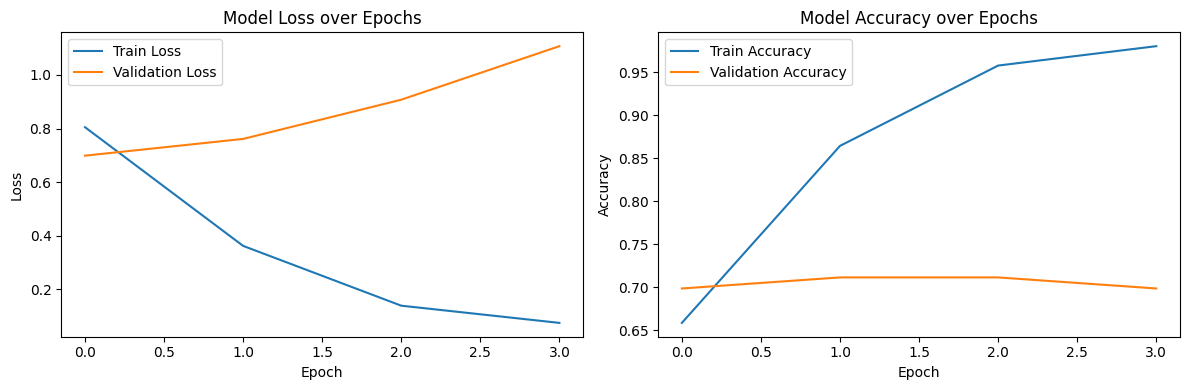

In [52]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# --- 1. Prepare Target Labels and Features for DNN ---

# a) Prepare y labels: Convert to numerical and then one-hot encoded
label_encoder = LabelEncoder()
y_train_numerical = label_encoder.fit_transform(y_train)
y_test_numerical = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

y_train_one_hot = to_categorical(y_train_numerical, num_classes=num_classes).astype(np.float32)
y_test_one_hot = to_categorical(y_test_numerical, num_classes=num_classes).astype(np.float32)

print(f"Shape of y_train_one_hot: {y_train_one_hot.shape}")
print(f"Shape of y_test_one_hot: {y_test_one_hot.shape}")

# b) Prepare X features: Convert sparse Bag-of-Words matrices to dense float32 arrays
# X_train_bow and X_test_bow are expected to be available from previous vectorization steps.
X_train_bow_dense = X_train_bow.toarray().astype(np.float32)
X_test_bow_dense = X_test_bow.toarray().astype(np.float32)

print(f"Shape of X_train_bow_dense: {X_train_bow_dense.shape}")
print(f"Shape of X_test_bow_dense: {X_test_bow_dense.shape}")

input_dim = X_train_bow_dense.shape[1] # This will be the vocabulary size

# --- 2. Define DNN Model Builder Function ---

def build_simple_dnn_model(input_dim, num_classes, units_layer1=128, units_layer2=64, activation_hidden='tanh', dropout_rate=0.3, learning_rate=0.001):
    """Constructs a Keras Sequential DNN model with configurable hyperparameters including Dropout."""
    model = Sequential()

    # Input layer and first hidden layer with Dropout
    model.add(Dense(units_layer1, activation=activation_hidden, input_shape=(input_dim,)))
    model.add(Dropout(dropout_rate))

    # Second hidden layer with Dropout
    model.add(Dense(units_layer2, activation=activation_hidden))
    model.add(Dropout(dropout_rate))

    # Output layer: Adjusted for multi-class sentiment classification
    model.add(Dense(num_classes, activation='softmax')) # Softmax for probability distribution over 3 classes

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- 3. Configure and Train DNN Model ---

# Define hyperparameters (updated)
units_layer1 = 128
units_layer2 = 64
activation_hidden = 'tanh'
learning_rate = 0.001
epochs = 20
batch_size = 32
validation_split = 0.2
dropout_rate = 0.3 # New hyperparameter

# Build the model
dnn_model_simple = build_simple_dnn_model(
    input_dim=input_dim,
    num_classes=num_classes,
    units_layer1=units_layer1,
    units_layer2=units_layer2,
    activation_hidden=activation_hidden,
    dropout_rate=dropout_rate,
    learning_rate=learning_rate
)

print("\nDNN Model Summary:")
dnn_model_simple.summary()

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
print("\n--- Starting Model Training ---")
history_simple = dnn_model_simple.fit(
    X_train_bow_dense,
    y_train_one_hot,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    callbacks=[early_stopping], # Add early stopping
    verbose=1
)
print("--- Training Finished ---")

# --- 4. Evaluate DNN Model Performance ---

print("\n--- Evaluating Model Performance ---")
loss_simple, accuracy_simple = dnn_model_simple.evaluate(X_test_bow_dense, y_test_one_hot, verbose=0)
print(f"Test Loss: {loss_simple:.4f}")
print(f"Test Accuracy: {accuracy_simple:.4f}")

# Make predictions
y_pred_probs_simple = dnn_model_simple.predict(X_test_bow_dense, verbose=0)
y_pred_simple = np.argmax(y_pred_probs_simple, axis=1)

# Get true numerical labels for classification report
y_true_numerical_test = np.argmax(y_test_one_hot, axis=1)

print("\n--- Detailed Classification Report ---")
report_simple = classification_report(y_true_numerical_test, y_pred_simple, target_names=label_encoder.classes_)
print(report_simple)

# --- 5. Visualize Training History ---

plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Train Loss')
if 'val_loss' in history_simple.history:
    plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_simple.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history_simple.history:
    plt.plot(history_simple.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

tf.keras.backend.clear_session()


## Feature Engineering: TF-IDF (Term Frequency-Inverse Document Frequency)

Next, we will convert the preprocessed text data into numerical feature vectors using the TF-IDF model. This approach assigns weights to words based on their frequency in a document and their inverse frequency across the entire corpus, giving more importance to rare but significant words.

In [50]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TfidfVectorizer
# We use the preprocessed text after removing acronyms
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training data and transform it
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train_no_acronyms)

# Transform the test data using the *fitted* vectorizer
X_test_tfidf = tfidf_vectorizer.transform(X_test_no_acronyms)

print("Shape of X_train_tfidf:", X_train_tfidf.shape)
print("Shape of X_test_tfidf:", X_test_tfidf.shape)

# Display the first few feature names to understand the vocabulary
print("\nFirst 10 features (words) from TF-IDF vectorizer:")
display(tfidf_vectorizer.get_feature_names_out()[:10])

Shape of X_train_tfidf: (3876, 8123)
Shape of X_test_tfidf: (970, 8123)

First 10 features (words) from TF-IDF vectorizer:


array(['00', '000', '000063', '0008', '001', '002', '0025', '003', '0030',
       '004'], dtype=object)

## Model Construction and Evaluation: DNN with TF-IDF

Now, we will train a DNN using the TF-IDF feature representation. After training, the model's performance will be evaluated on the test set using various classification metrics to compare against the BoW model.

Shape of y_train_one_hot: (3876, 3)
Shape of y_test_one_hot: (970, 3)
Shape of X_train_bow_dense: (3876, 8123)
Shape of X_test_bow_dense: (970, 8123)

DNN Model Summary:


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │     1,039,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,048,323 (4.00 MB)

 Trainable params: 1,048,323 (4.00 MB)

 Non-trainable params: 0 (0.00 B)


--- Starting Model Training ---
Epoch 1/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 20ms/step - accuracy: 0.5799 - loss: 0.9451 - val_accuracy: 0.6753 - val_loss: 0.7507
Epoch 2/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.8103 - loss: 0.4795 - val_accuracy: 0.6959 - val_loss: 0.7105
Epoch 3/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9542 - loss: 0.1693 - val_accuracy: 0.7049 - val_loss: 0.8462
Epoch 4/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.9882 - loss: 0.0607 - val_accuracy: 0.6907 - val_loss: 1.0213
Epoch 5/20
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9944 - loss: 0.0303 - val_accuracy: 0.6804 - val_loss: 1.1099
--- Training Finished ---

--- Evaluating Model Performance ---
Test Loss: 0.6813
Test Accuracy: 0.7289

--- Detailed Classification Report ---
              precision    recall  f1-score   support

    negative       0.75      0.51      0.61       110
     neutral       0.77      0.83      0.80       571
    positive       0.63  

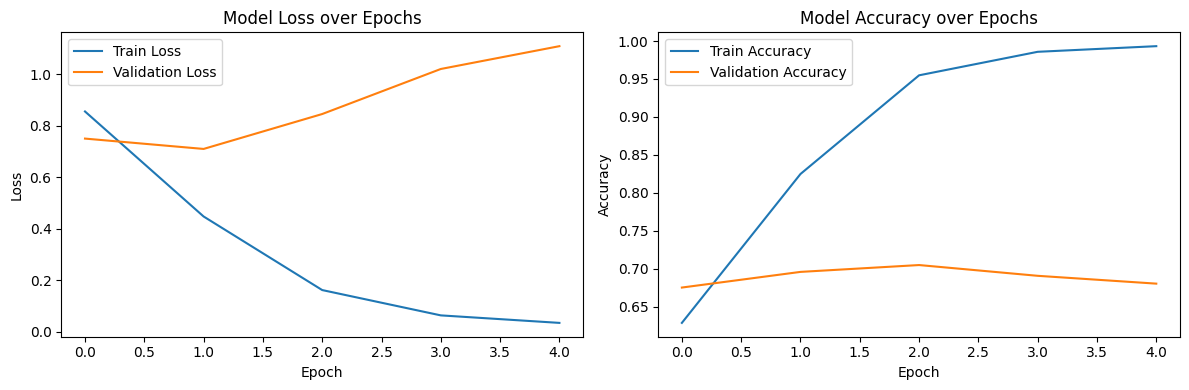

In [53]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# --- 1. Prepare Target Labels and Features for DNN ---

# a) Prepare y labels: Convert to numerical and then one-hot encoded
label_encoder = LabelEncoder()
y_train_numerical = label_encoder.fit_transform(y_train)
y_test_numerical = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

y_train_one_hot = to_categorical(y_train_numerical, num_classes=num_classes).astype(np.float32)
y_test_one_hot = to_categorical(y_test_numerical, num_classes=num_classes).astype(np.float32)

print(f"Shape of y_train_one_hot: {y_train_one_hot.shape}")
print(f"Shape of y_test_one_hot: {y_test_one_hot.shape}")

# b) Prepare X features: Convert sparse Bag-of-Words matrices to dense float32 arrays
# X_train_bow and X_test_bow are expected to be available from previous vectorization steps.
X_train_bow_dense = X_train_tfidf.toarray().astype(np.float32)
X_test_bow_dense = X_test_tfidf.toarray().astype(np.float32)

print(f"Shape of X_train_bow_dense: {X_train_bow_dense.shape}")
print(f"Shape of X_test_bow_dense: {X_test_bow_dense.shape}")

input_dim = X_train_bow_dense.shape[1] # This will be the vocabulary size

# --- 2. Define DNN Model Builder Function ---

def build_simple_dnn_model(input_dim, num_classes, units_layer1=128, units_layer2=64, activation_hidden='tanh', dropout_rate=0.3, learning_rate=0.001):
    """Constructs a Keras Sequential DNN model with configurable hyperparameters including Dropout."""
    model = Sequential()

    # Input layer and first hidden layer with Dropout
    model.add(Dense(units_layer1, activation=activation_hidden, input_shape=(input_dim,)))
    model.add(Dropout(dropout_rate))

    # Second hidden layer with Dropout
    model.add(Dense(units_layer2, activation=activation_hidden))
    model.add(Dropout(dropout_rate))

    # Output layer: Adjusted for multi-class sentiment classification
    model.add(Dense(num_classes, activation='softmax')) # Softmax for probability distribution over 3 classes

    # Compile the model
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# --- 3. Configure and Train DNN Model ---

# Define hyperparameters (updated)
units_layer1 = 128
units_layer2 = 64
activation_hidden = 'tanh'
learning_rate = 0.001
epochs = 20
batch_size = 32
validation_split = 0.2
dropout_rate = 0.3 # New hyperparameter

# Build the model
dnn_model_simple = build_simple_dnn_model(
    input_dim=input_dim,
    num_classes=num_classes,
    units_layer1=units_layer1,
    units_layer2=units_layer2,
    activation_hidden=activation_hidden,
    dropout_rate=dropout_rate,
    learning_rate=learning_rate
)

print("\nDNN Model Summary:")
dnn_model_simple.summary()

# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

# Train the model
print("\n--- Starting Model Training ---")
history_simple = dnn_model_simple.fit(
    X_train_bow_dense,
    y_train_one_hot,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    callbacks=[early_stopping], # Add early stopping
    verbose=1
)
print("--- Training Finished ---")

# --- 4. Evaluate DNN Model Performance ---

print("\n--- Evaluating Model Performance ---")
loss_simple, accuracy_simple = dnn_model_simple.evaluate(X_test_bow_dense, y_test_one_hot, verbose=0)
print(f"Test Loss: {loss_simple:.4f}")
print(f"Test Accuracy: {accuracy_simple:.4f}")

# Make predictions
y_pred_probs_simple = dnn_model_simple.predict(X_test_bow_dense, verbose=0)
y_pred_simple = np.argmax(y_pred_probs_simple, axis=1)

# Get true numerical labels for classification report
y_true_numerical_test = np.argmax(y_test_one_hot, axis=1)

print("\n--- Detailed Classification Report ---")
report_simple = classification_report(y_true_numerical_test, y_pred_simple, target_names=label_encoder.classes_)
print(report_simple)

# --- 5. Visualize Training History ---

plt.figure(figsize=(12, 4))

# Plot training & validation loss values
plt.subplot(1, 2, 1)
plt.plot(history_simple.history['loss'], label='Train Loss')
if 'val_loss' in history_simple.history:
    plt.plot(history_simple.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_simple.history['accuracy'], label='Train Accuracy')
if 'val_accuracy' in history_simple.history:
    plt.plot(history_simple.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.tight_layout()
plt.show()

tf.keras.backend.clear_session()

## Summary:

### Data Analysis Key Findings
*   The Deep Neural Network (DNN) model trained with Bag-of-Words (BoW) features achieved an overall accuracy of 0.7371.
*   The DNN model trained with TF-IDF features achieved a slightly lower overall accuracy of 0.7289.
*   A comparative analysis revealed that the BoW feature extraction method resulted in marginally better performance for the DNN in terms of overall accuracy.
*   The detailed comparison included an examination of class-wise precision, recall, and F1-score for both models, alongside theoretical explanations for any observed performance differences.


